In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
sns.set()

In [2]:
atlCases = pd.read_csv('Covid-Data/atlCases.csv', parse_dates = [9])
jfkCases = pd.read_csv('Covid-Data/jfkCases.csv')
lgaCases = pd.read_csv('Covid-Data/lgaCases.csv')
seaCases = pd.read_csv('Covid-Data/seaCases.csv')
laxCases = pd.read_csv('Covid-Data/laxCases.csv')
yvrCases = pd.read_csv('Covid-Data/yvrCases.csv', parse_dates = [9])
yegCases = pd.read_csv('Covid-Data/yegCases.csv')
yyzCases = pd.read_csv('Covid-Data/yyzCases.csv')
yulCases = pd.read_csv('Covid-Data/yulCases.csv')

In [3]:
def makeTimestamp(x):
    return x.timestamp()

In [19]:
# Do USA later.

# YVR 

In [5]:
yvrCases = yvrCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yvrCases.loc[0,"Difference"] = 0
yvrCases["timestamp"] = yvrCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yvrCases["timestamp"], yvrCases["Difference"])
yvrCases["Prediction"] = yvrCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(5.667180601702926e-06, -8981.453237790729)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


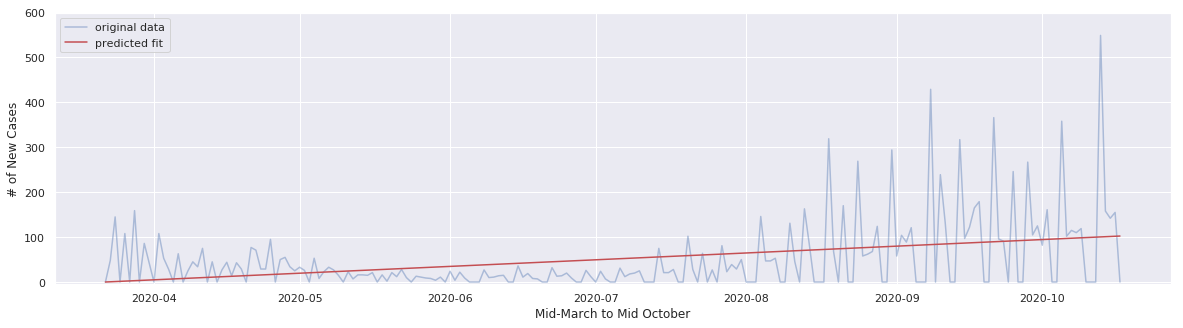

In [6]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,600)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yvrCases["Date"], yvrCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yvrCases["Date"], yvrCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

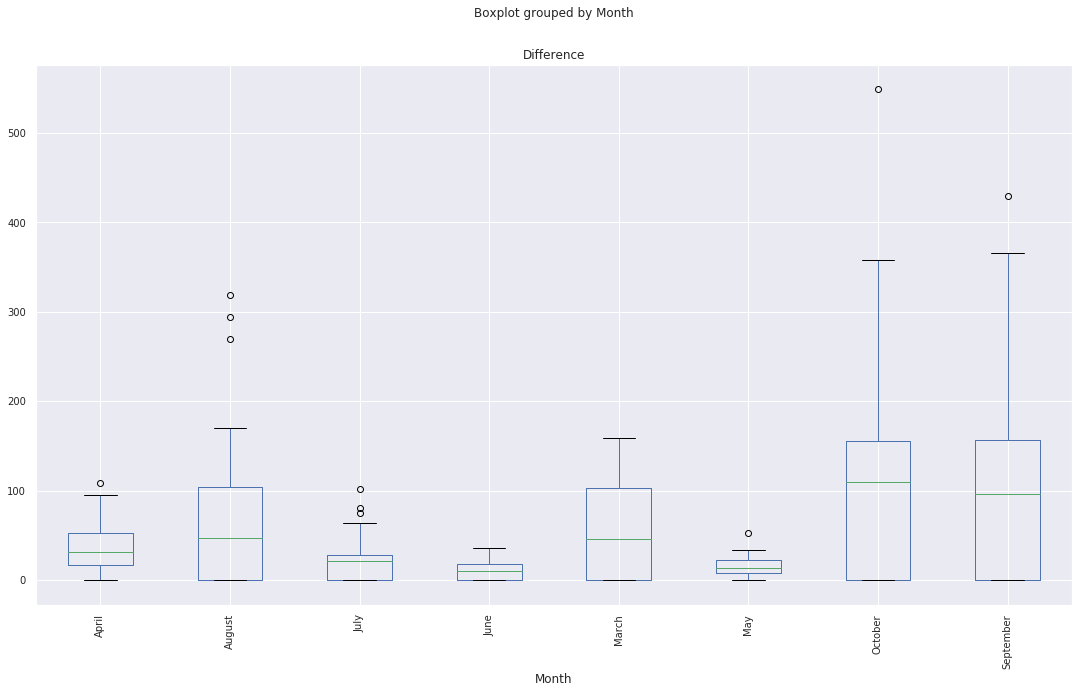

In [15]:
yvrCases["Month"] = yvrCases['Date'].dt.month_name()
yvrCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

In [18]:
yvrCases.groupby(['Month'])["Difference"].mean()

Month
April         36.633333
August        69.322581
July          23.387097
June          11.433333
March         58.900000
May           14.870968
October      120.647059
September    111.600000
Name: Difference, dtype: float64

In [21]:
yvrCases

# YEG

In [23]:
yegCases["Date"] = pd.to_datetime(yegCases["Date"])
#yegCases = yegCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yegCases.loc[0,"Difference"] = 0
yegCases["timestamp"] = yegCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yegCases["timestamp"], yegCases["Difference"])
yegCases["Prediction"] = yegCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(5.037682170383593e-06, -7926.923111959132)

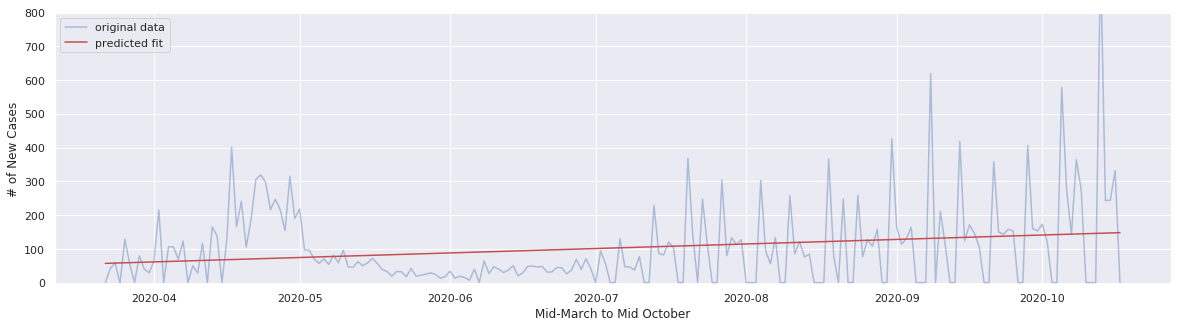

In [26]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,800)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yegCases["Date"], yegCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yegCases["Date"], yegCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

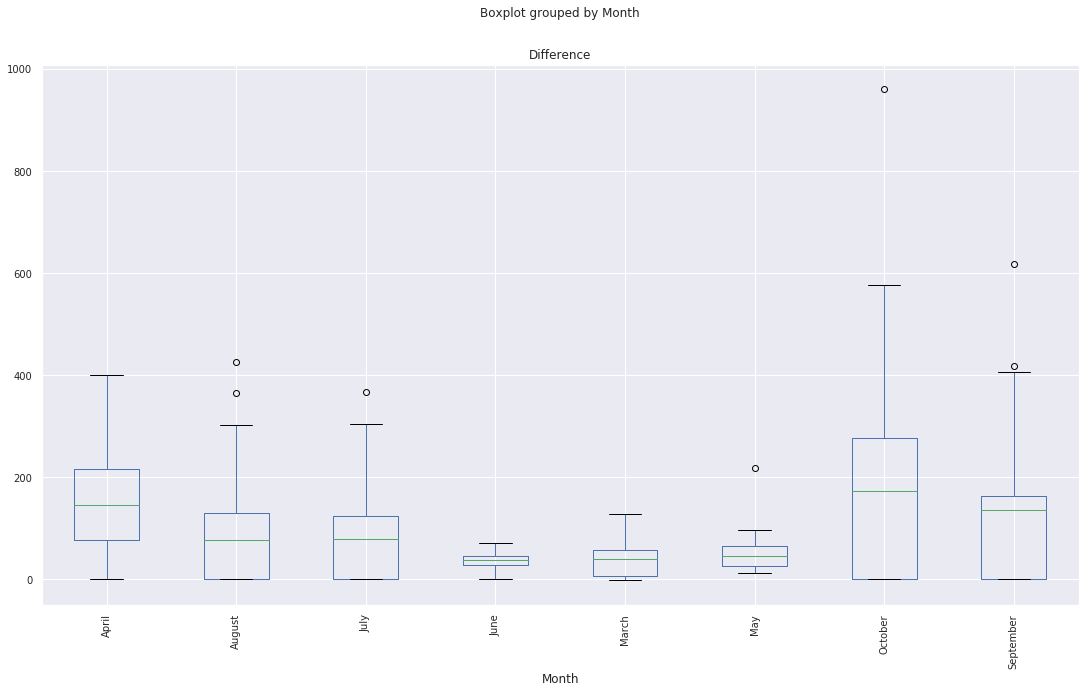

In [27]:
yegCases["Month"] = yegCases['Date'].dt.month_name()
yegCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

In [28]:
yegCases.groupby(['Month'])["Difference"].mean()

Month
April        155.500000
August        98.677419
July          88.225806
June          36.600000
March         43.100000
May           53.387097
October      218.411765
September    138.666667
Name: Difference, dtype: float64

# YYZ 

In [30]:
yyzCases["Date"] = pd.to_datetime(yyzCases["Date"])
yyzCases = yyzCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yyzCases.loc[0,"Difference"] = 0
yyzCases["timestamp"] = yyzCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yyzCases["timestamp"], yyzCases["Difference"])
yyzCases["Prediction"] = yyzCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(-7.972531981012912e-07, 1582.3512665766116)

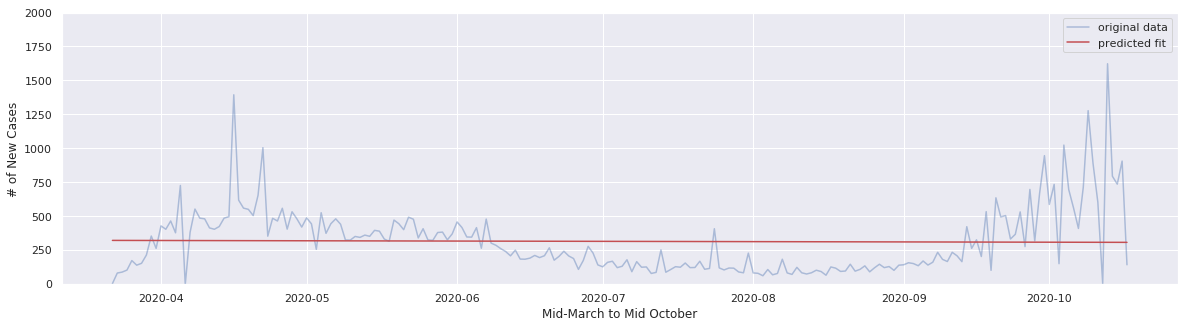

In [32]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,2000)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yyzCases["Date"], yyzCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yyzCases["Date"], yyzCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

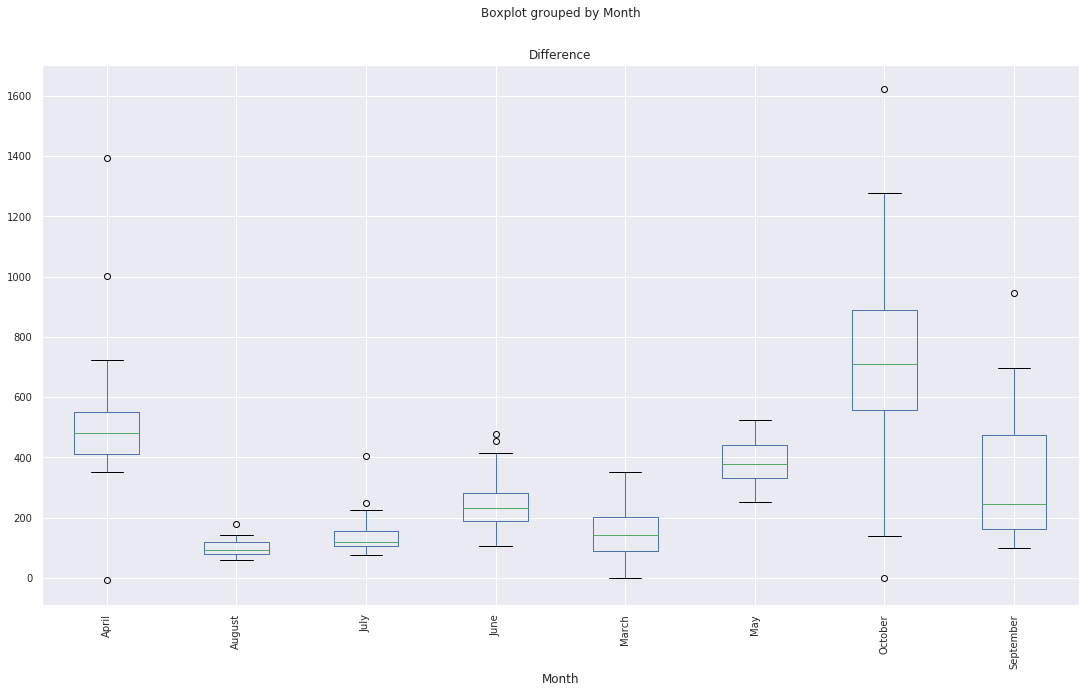

In [34]:
yyzCases["Month"] = yyzCases['Date'].dt.month_name()
yyzCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

# YUL

In [35]:
yulCases["Date"] = pd.to_datetime(yulCases["Date"])
yulCases = yulCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yulCases.loc[0,"Difference"] = 0
yulCases["timestamp"] = yulCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yulCases["timestamp"], yulCases["Difference"])
yulCases["Prediction"] = yulCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(-1.2949151746233315e-05, 21071.562989334605)

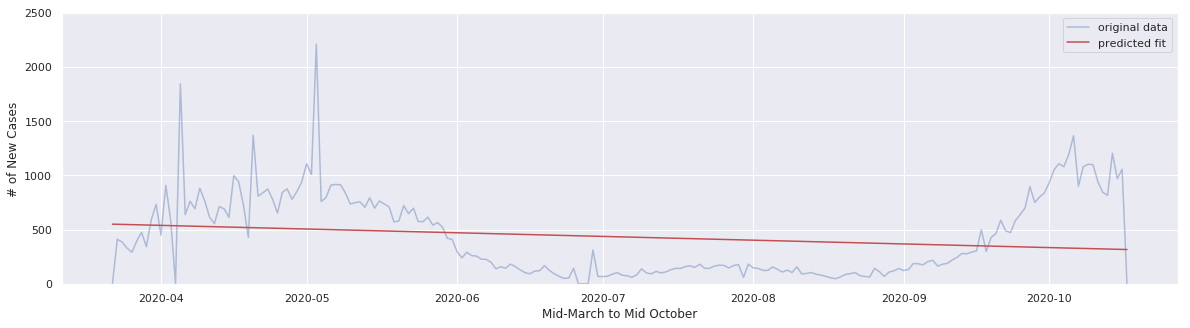

In [37]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,2500)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yulCases["Date"], yulCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yulCases["Date"], yulCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

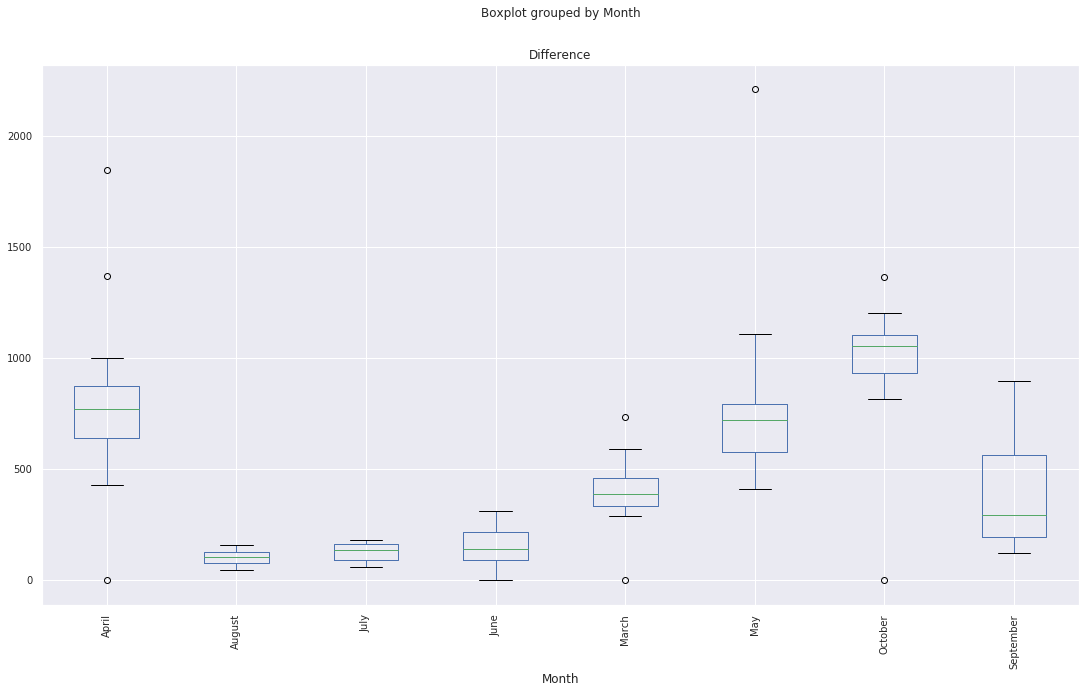

In [38]:
yulCases["Month"] = yulCases['Date'].dt.month_name()
yulCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))